In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load image and convert to gray and floating point
img = cv2.imread('../resources/images/graffiti.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Convert the image to floating point
gray = np.float32(gray)

In [4]:
# Define sobel filter and use cv2.filter2D to filter the grayscale image
sobel_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

# Use cv2.filter2D to filter the grayscale image
I_x = cv2.filter2D(gray, cv2.CV_32F, sobel_filter)
I_y = cv2.filter2D(gray, cv2.CV_32F, sobel_filter.T)

In [5]:
# Compute G_xx, G_yy, G_xy using cv2.filter2D
Gxx = cv2.filter2D(I_x ** 2, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)
Gyy = cv2.filter2D(I_y ** 2, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)
Gxy = cv2.filter2D(I_x * I_y, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)

In [6]:
# Sum over all G_xx etc. 3x3 neighbors to compute entries of the matrix M
sumGxx = cv2.filter2D(Gxx, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)
sumGyy = cv2.filter2D(Gyy, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)
sumGxy = cv2.filter2D(Gxy, -1, np.ones((3, 3)), borderType=cv2.BORDER_CONSTANT)

In [7]:
# Define parameters
k = 0.04
threshold = 0.01

In [8]:
# Compute the determinant and trace of M
det_M = (sumGxx * sumGyy) - (sumGxy ** 2)
trace_M = sumGxx + sumGyy

In [9]:
# Compute the determinat and trace of M using sumGxx, sumGyy, sumGxy. With det(M) and trace(M)
harris = det_M - k * (trace_M ** 2)

In [10]:
# Filter the harris image with 'harris > threshold * harris.max()'
harris_thres = np.zeros(harris.shape)
harris_thres[harris > threshold * harris.max()] = [255]

In [11]:
# The OpenCV implementation
harris_cv = cv2.cornerHarris(gray, 3, 3, k)

In [12]:
# intialize in black - set pixels with corners in with
harris_cv_thres = np.zeros(harris_cv.shape)
harris_cv_thres[harris_cv > threshold * harris_cv.max()] = [255]

In [13]:
# Print the difference between the two implementations
print("====================================")
print("DIFF:", np.sum(np.absolute(harris_thres - harris_cv_thres)))
print("====================================")

DIFF: 1431570.0


In [14]:
# Optionally, you can save the resulting images
path = '../output/Exercise 3/'
cv2.imwrite(path+"Harris_own.png", harris_thres)
cv2.imwrite(path+"Harris_cv.png", harris_cv_thres)
cv2.imwrite(path+"Image_with_Harris.png", img)

True

In [15]:
# The OpenCV implementation looks like this - please do not change
harris_cv = cv2.cornerHarris(gray,3,3,k)

# intialize in black - set pixels with corners in with
harris_cv_thres = np.zeros(harris_cv.shape)
harris_cv_thres[harris_cv>threshold*harris_cv.max()]=[255]

# please leave this - adjust variable name if desired
print("====================================")
print("DIFF:", np.sum(np.absolute(harris_thres - harris_cv_thres)))
print("====================================")

DIFF: 1431570.0


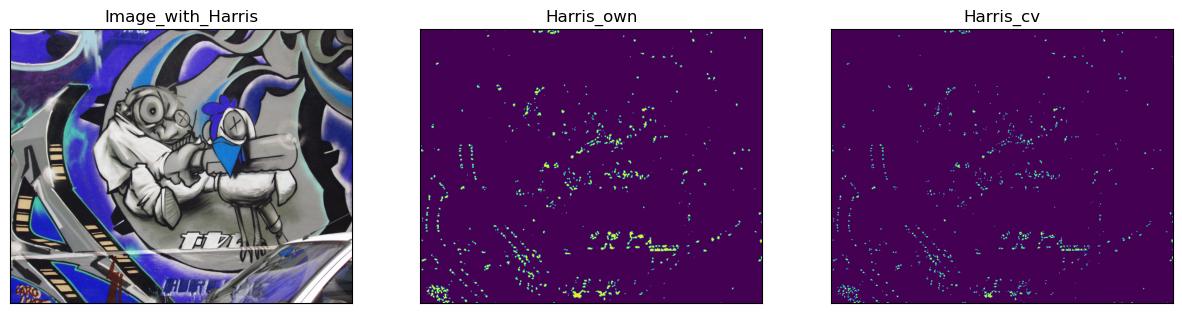

In [16]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1),plt.imshow(img)
plt.title('Image_with_Harris'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2),plt.imshow(harris_thres)
plt.title('Harris_own'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3),plt.imshow(harris_cv_thres)
plt.title('Harris_cv'), plt.xticks([]), plt.yticks([])

plt.show()